In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

In [4]:
# Read the shapefile (Geopandas will look for .shp, .shx, and .dbf files)
flood_shapefile_path = 'MetroManila_Flood_100year.shp'
flood_gdf = gpd.read_file(flood_shapefile_path)

# Display the first few rows of the GeoDataFrame
print(flood_gdf.head())

   Var                                           geometry
0  1.0  MULTIPOLYGON (((285550.000 1590130.000, 285550...
1  2.0  MULTIPOLYGON (((285590.000 1590210.000, 285590...
2  3.0  MULTIPOLYGON (((287455.000 1590365.000, 287465...


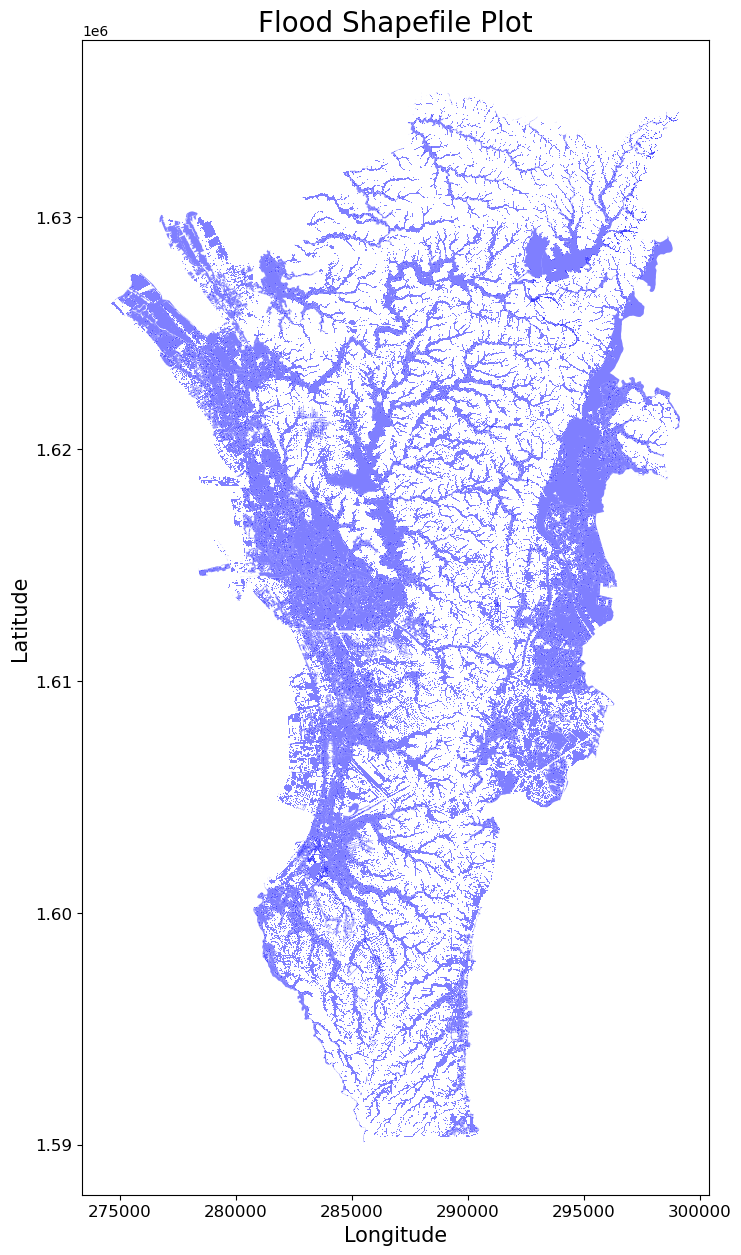

In [7]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the GeoDataFrame with customizations
flood_gdf.plot(ax=ax, color='blue', edgecolor='none', alpha=0.5)

# Customize the plot
ax.set_title('Flood Shapefile Plot', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [40]:
landslide_shapefile_path = 'MetroManila_LandslideHazards.shp'
landslide_gdf = gpd.read_file(landslide_shapefile_path)

print(landslide_gdf.head())

    LH                                           geometry
0  1.0  MULTIPOLYGON (((121.01610 14.35231, 121.01610 ...
1  2.0  MULTIPOLYGON (((121.01702 14.35259, 121.01702 ...
2  3.0  MULTIPOLYGON (((121.02052 14.35506, 121.02061 ...


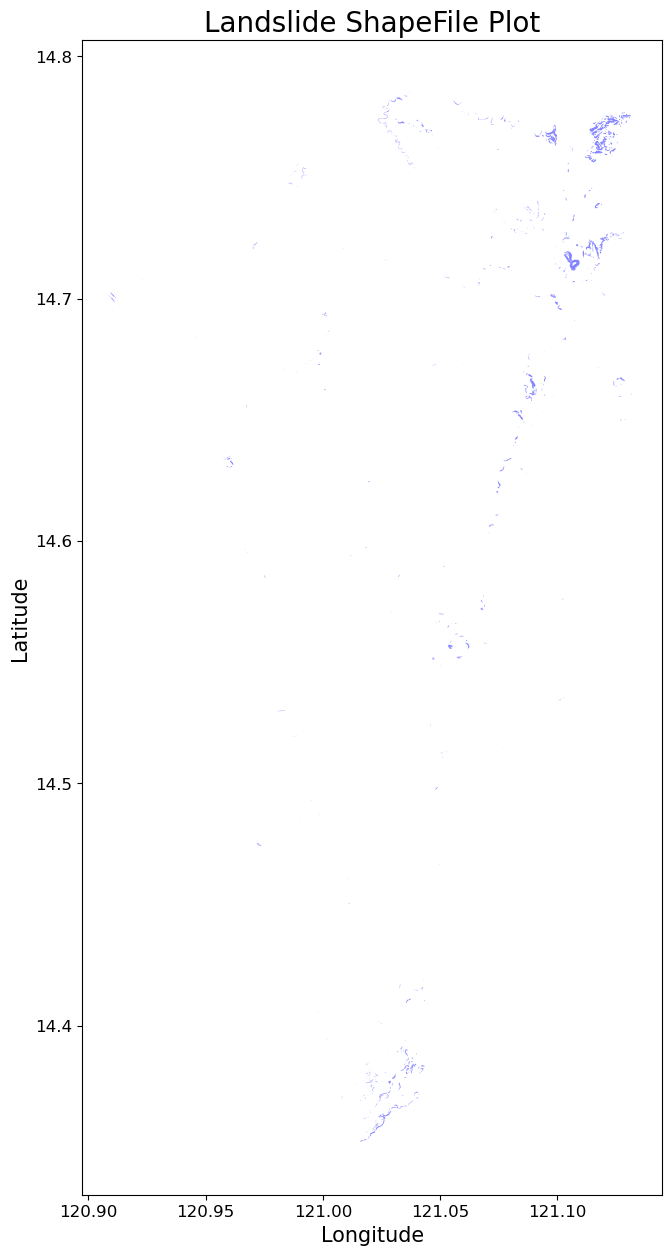

In [41]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the GeoDataFrame with customizations
landslide_gdf.plot(ax=ax, color='blue', edgecolor='none', alpha=0.5)

# Customize the plot
ax.set_title('Landslide ShapeFile Plot', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [18]:
# Load the school datasets
schools_df1 = pd.read_csv('schools-dataset.csv')
schools_df2 = pd.read_csv('schools-dataset-cleaned-and-reviewed-1.tsv', sep='\t')

# Combine the datasets into one DataFrame
combined_schools_df = pd.concat([schools_df1, schools_df2], ignore_index=True)

# Filter out schools that are not in Metro Manila
metro_manila_schools_df = combined_schools_df[combined_schools_df['addr:region'] == 'National Capital Region']

# Display the filtered DataFrame
metro_manila_schools_df.head(), metro_manila_schools_df.shape

(          @id                                               name short_name  \
 20214  320303  Las Piñas National High School – Gatchalian Annex        NaN   
 28355  228502                    Alabang Elementary School Annex        NaN   
 29492  136789                    Pilar Village Elementary School        NaN   
 29500  226501    Moonwalk Elementary School – Golden Acres Annex        NaN   
 29504  305432                  Golden Acres National High School        NaN   
 
       old_name date_started  population:pupils:2012  population:pupils:2015  \
 20214      NaN         2008                    1036                   980.0   
 28355      NaN         2012                    1042                  1171.0   
 29492      NaN         1986                    2835                  2943.0   
 29500      NaN         2002                    5256                  4602.0   
 29504      NaN         1994                    3870                  3826.0   
 
       isced:level              addr

In [26]:
metro_manila_schools_df.columns

Index(['@id', 'name', 'short_name', 'old_name', 'date_started',
       'population:pupils:2012', 'population:pupils:2015', 'isced:level',
       'addr:region', 'addr:province', 'addr:town', 'addr:city',
       'addr:borough', 'addr:housenumber', 'addr:street', 'addr:street:corner',
       'addr:neighbourhood', 'addr:village', 'addr:hamlet', 'operator',
       'latitude', 'longitude', 'hrslph100m', 'priority'],
      dtype='object')

In [23]:
# Define the valid range for Metro Manila (NCR)
latitude_range = (14.40, 14.85)
longitude_range = (120.90, 121.15)

# Filter the schools within the specified latitude and longitude range
valid_metro_manila_schools_df = metro_manila_schools_df[
    (metro_manila_schools_df['latitude'] >= latitude_range[0]) &
    (metro_manila_schools_df['latitude'] <= latitude_range[1]) &
    (metro_manila_schools_df['longitude'] >= longitude_range[0]) &
    (metro_manila_schools_df['longitude'] <= longitude_range[1])
]

# Check if there are any outliers removed
outliers_removed = metro_manila_schools_df[
    (metro_manila_schools_df['latitude'] < latitude_range[0]) |
    (metro_manila_schools_df['latitude'] > latitude_range[1]) |
    (metro_manila_schools_df['longitude'] < longitude_range[0]) |
    (metro_manila_schools_df['longitude'] > longitude_range[1])
]

valid_metro_manila_schools_df.shape, outliers_removed.shape

((1440, 24), (34, 24))

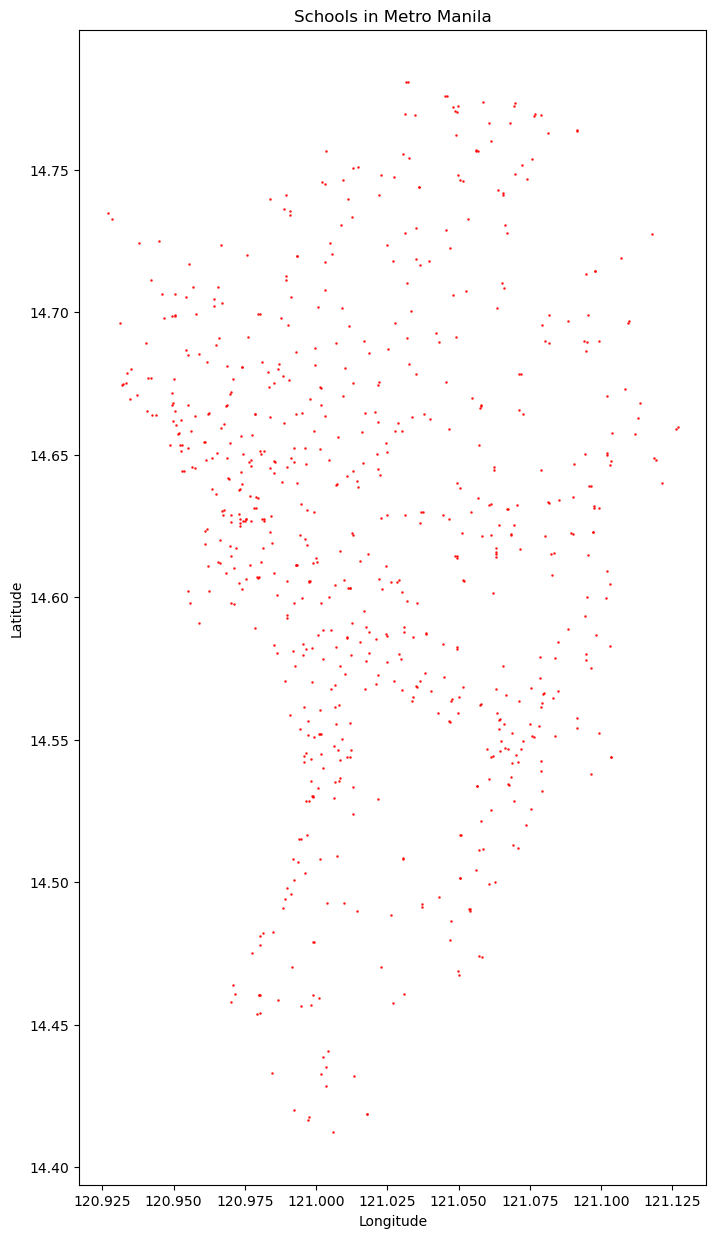

In [37]:
# Convert the filtered DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(valid_metro_manila_schools_df['longitude'], valid_metro_manila_schools_df['latitude'])]
schools_gdf = gpd.GeoDataFrame(valid_metro_manila_schools_df, geometry=geometry)

# Plot the schools in Metro Manila
fig, ax = plt.subplots(figsize=(15, 15))
schools_gdf.plot(ax=ax, color='red', markersize=0.5, alpha=0.6)

# Customize the plot
ax.set_title('Schools in Metro Manila')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [32]:
import geopandas as gpd

# Load the shapefile
shapefile_path = 'Regions.shp.shp'
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Display the columns in the shapefile
print(gdf.columns)

# Display basic information about the GeoDataFrame
print(gdf.info())

# Display the coordinate reference system (CRS)
print(gdf.crs)

   psgc_code                        name   corr_code geo_level  city_class  \
0  100000000    Region I (Ilocos Region)  10000000.0       Reg         NaN   
1  200000000  Region II (Cagayan Valley)  20000000.0       Reg         NaN   
2  300000000  Region III (Central Luzon)  30000000.0       Reg         NaN   
3  400000000    Region IV-A (CALABARZON)  40000000.0       Reg         NaN   
4  500000000     Region V (Bicol Region)  50000000.0       Reg         NaN   

   inc_class  urb_rur  pop_2015 pop_2020 status adm1_pcode  \
0        NaN      NaN       NaN      NaN    NaN       PH01   
1        NaN      NaN       NaN      NaN    NaN       PH02   
2        NaN      NaN       NaN      NaN    NaN       PH03   
3        NaN      NaN       NaN      NaN    NaN       PH04   
4        NaN      NaN       NaN      NaN    NaN       PH05   

                      adm1_en        adm1_alt adm0_pcode            adm0_en  \
0    Region I (Ilocos Region)   Ilocos Region         PH  Philippines (the)   


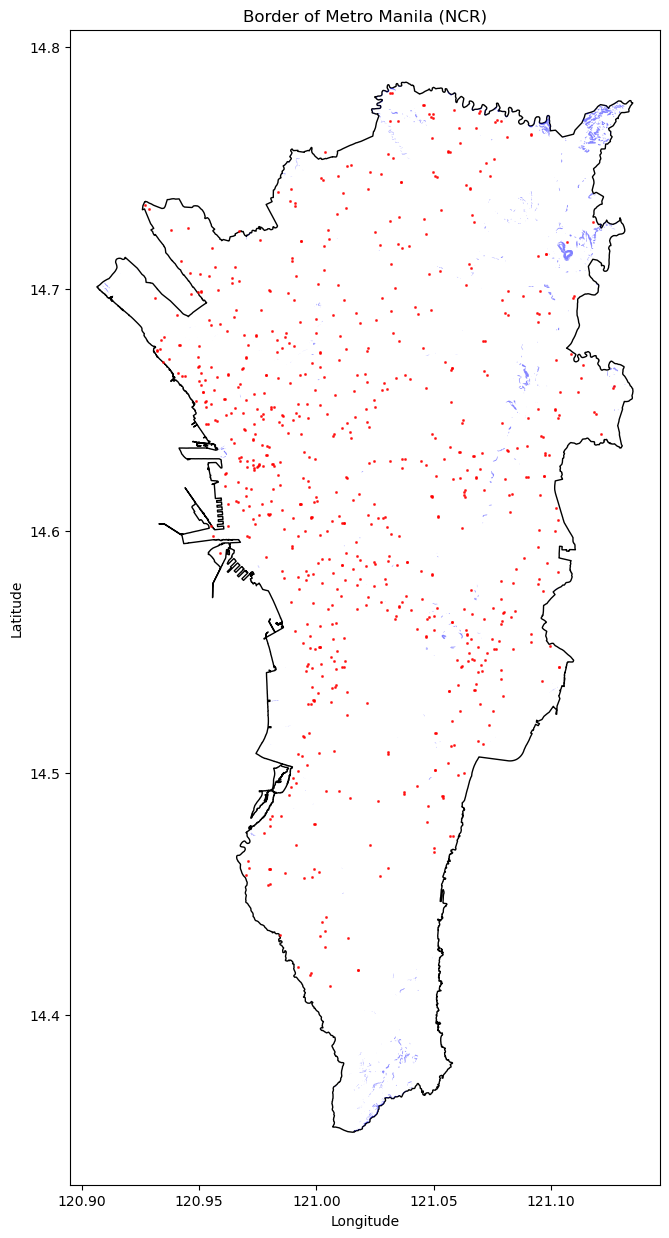

In [42]:
# Filter the GeoDataFrame to get only Metro Manila (NCR)
ncr_gdf = gdf[gdf['name'].str.contains('National Capital Region', case=False)]

# Plot the NCR borders
fig, ax = plt.subplots(figsize=(15, 15))
ncr_gdf.plot(ax=ax, color='none', edgecolor='black')
schools_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5)
landslide_gdf.plot(ax=ax, color='blue', edgecolor='none', alpha=0.5)

# Customize the plot
ax.set_title('Border of Metro Manila (NCR)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
# pip install folium

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Path to the uploaded CSV file
csv_path = 'schools-dataset.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Convert latitude and longitude columns to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Drop rows with invalid latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Customize the plot
ax.set_title('School Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
# Read the CSV file
df = pd.read_csv(csv_path)

# Convert latitude and longitude columns to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Filter the DataFrame for rows where 'addr:region' is 'National Capital Region'
df_ncr = df[df['addr:region'] == 'National Capital Region']

# Drop rows with invalid latitude or longitude
df_ncr = df_ncr.dropna(subset=['latitude', 'longitude'])

# Convert the filtered DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_ncr['longitude'], df_ncr['latitude'])]
gdf_ncr = gpd.GeoDataFrame(df_ncr, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf_ncr.set_crs(epsg=4326, inplace=True)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ncr.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Customize the plot
ax.set_title('School Locations in National Capital Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
pip install arcgis

In [ ]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
import geopandas as gpd
import matplotlib.pyplot as plt

# Connect to ArcGIS Online
gis = GIS("https://www.arcgis.com")

# Access the item using its ID
item_id = 'e4b2bc9b68254609b5965b16163eba3b'
item = gis.content.get(item_id)

# Print item information to ensure it is correctly accessed
print(f"Title: {item.title}")
print(f"Type: {item.type}")

# Get the first feature layer from the item
feature_layer = item.layers[0]

# Query the feature layer
features = feature_layer.query(where='1=1', out_fields='*')
gdf = features.sdf  # Convert to Spatial DataFrame (GeoPandas DataFrame)

# Convert the spatial dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(gdf, geometry='SHAPE')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Customize the plot
ax.set_title('ArcGIS Online Feature Layer Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
gdf

In [ ]:
import pandas as pd

df = pd.read_csv('schools-dataset.csv')
df.head()

In [ ]:
from datetime import datetime

# Current year
current_year = datetime.now().year

# Calculate the age of each school
df['age'] = current_year - pd.to_datetime(df['date_started'], errors='coerce').dt.year

# Define the bins and labels
bins = [0, 20, 50, 100, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

# Bin the schools by age and assign risk scores
df['structural_risk_score'] = pd.cut(df['age'], bins=bins, labels=labels)
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the distribution of age and structural risk
sns.histplot(data=df, x='age', hue='risk_score', multiple='stack', palette='viridis')

# Adding titles and labels
plt.title('Distribution of School Age and Structural Risk')
plt.xlabel('Age of School (Years)')
plt.ylabel('Number of Schools')
plt.legend(title='Structural Risk', loc='upper right')

# Display the plot
plt.show()

In [ ]:
import zipfile
from fastkml import kml
from shapely.geometry import shape
import geopandas as gpd
import os

# Path to the KMZ file
kmz_path = 'liq_2013_130000000_01.kmz'
kml_file_name = 'doc.kml'

# Extract the KMZ file
with zipfile.ZipFile(kmz_path, 'r') as kmz:
    kmz.extractall()

# Parse the KML file
kml_file_path = os.path.join(os.path.dirname(kmz_path), kml_file_name)
with open(kml_file_path, 'rt', encoding='utf-8') as f:
    kml_content = f.read()

k = kml.KML()
k.from_string(kml_content)

# Assuming the KML file contains Placemarks
features = list(k.features())[0].features()

# Convert to GeoDataFrame
geometries = []
names = []

for feature in features:
    geometries.append(shape(feature.geometry))
    names.append(feature.name)

gdf = gpd.GeoDataFrame({'name': names, 'geometry': geometries})

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Print the GeoDataFrame
print(gdf.head())

# Plot the GeoDataFrame
gdf.plot()
plt.show()


In [ ]:
import zipfile
from fastkml import kml
from shapely.geometry import shape
import geopandas as gpd
import os

# Path to the KMZ file
kmz_path = 'liq_2013_130000000_01.kmz'
kml_file_name = 'doc.kml'

# Extract the KMZ file
with zipfile.ZipFile(kmz_path, 'r') as kmz:
    kmz.extractall()

# Parse the KML file
kml_file_path = os.path.join(os.path.dirname(kmz_path), kml_file_name)
with open(kml_file_path, 'rb') as f:
    kml_content = f.read()

k = kml.KML()
k.from_string(kml_content.decode('utf-8'))

# Assuming the KML file contains Placemarks
features = list(k.features())[0].features()

# Convert to GeoDataFrame
geometries = []
names = []

for feature in features:
    geometries.append(shape(feature.geometry))
    names.append(feature.name)

gdf = gpd.GeoDataFrame({'name': names, 'geometry': geometries})

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Print the GeoDataFrame
print(gdf.head())

# Plot the GeoDataFrame
gdf.plot()
plt.show()
